# Data Science Jobs Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df = pd.read_csv("salaries.csv")
dimensions = df.shape

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Science,75000,USD,75000,US,100,US,M
1,2024,MI,FT,Data Science,55000,USD,55000,US,100,US,M
2,2024,EX,FT,Data Engineer,253900,USD,253900,US,0,US,M
3,2024,EX,FT,Data Engineer,145100,USD,145100,US,0,US,M
4,2024,MI,FT,Research Scientist,138000,USD,138000,US,0,US,M


In [3]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,15690.000000,1.569000e+04,15690.000000,15690.000000
mean,2023.185277,1.647878e+05,149825.729509,32.374124
std,0.708993,3.495688e+05,68649.069457,46.365834
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.021000e+05,101822.250000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.875000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


/home/porto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


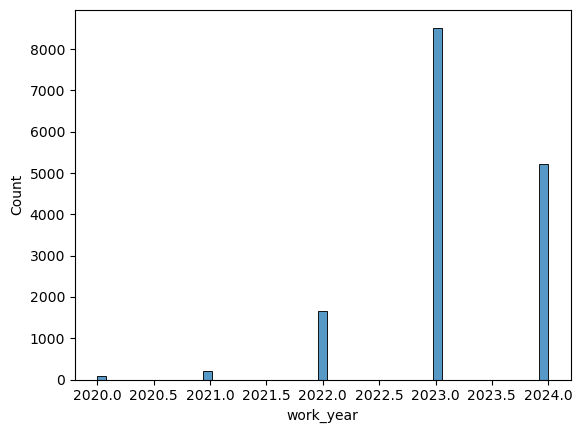

/home/porto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


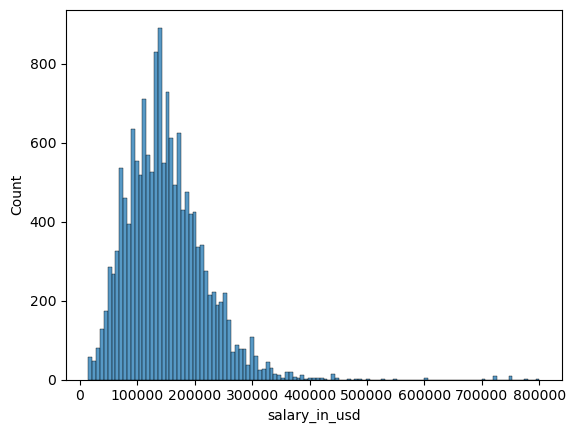

/home/porto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


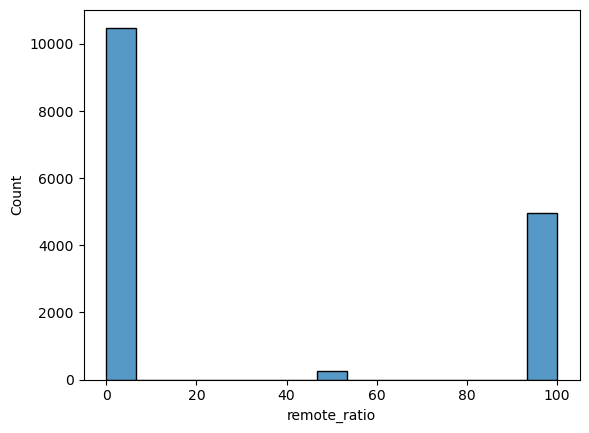

In [4]:
def make_displots(columns):
    for column in columns:
        sns.histplot(x=column, data=df)
        plt.show()
        
columns = ['work_year', 'salary_in_usd', 'remote_ratio']
make_displots(columns)

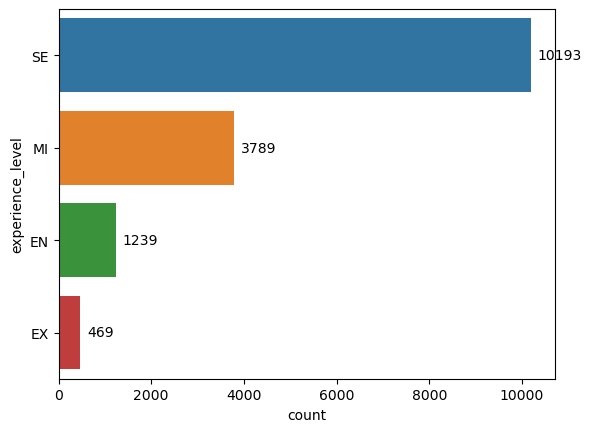

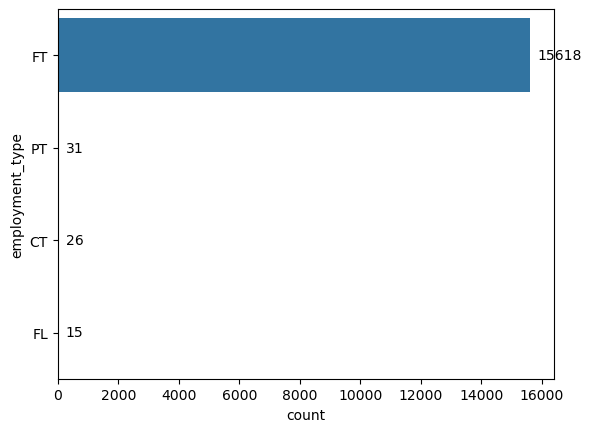

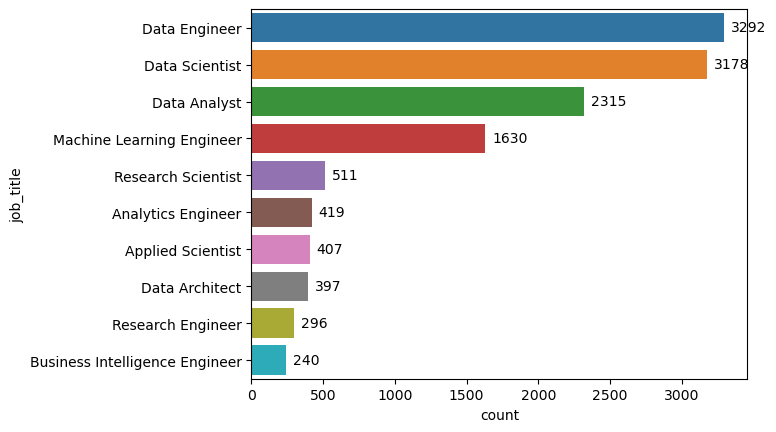

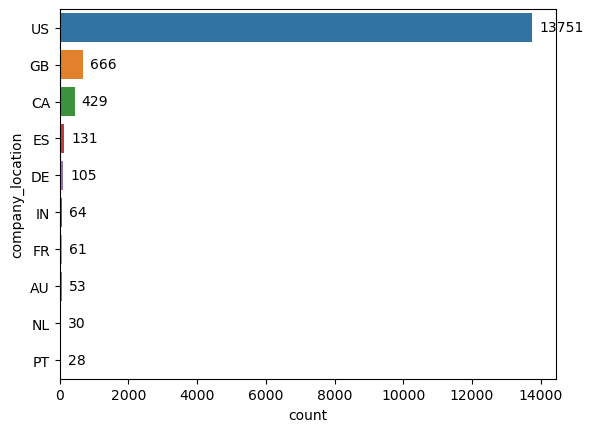

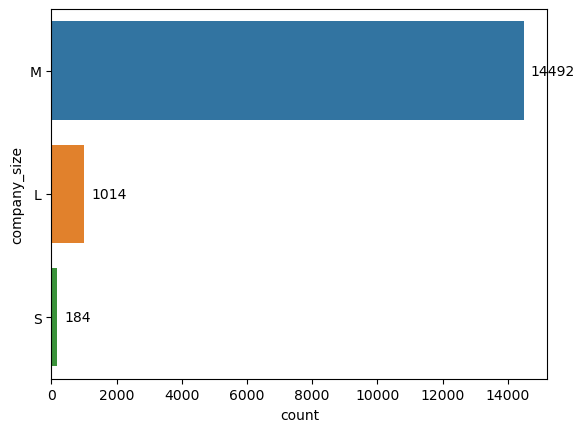

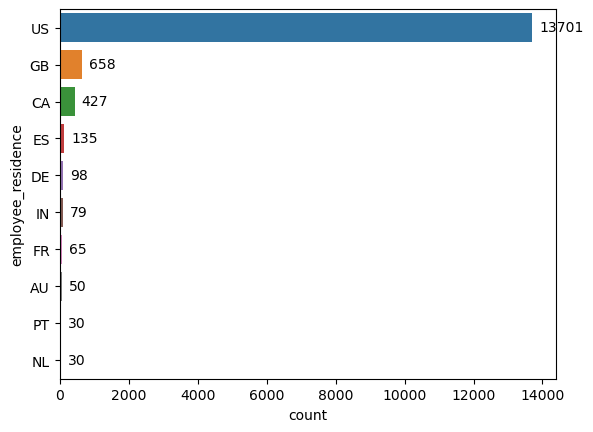

In [5]:
def make_countplots(columns):
    for column in columns:
        ax = sns.countplot(y=column, data=df, order=df[column].value_counts().iloc[:10].index)

        for p in ax.patches:
            width = p.get_width()
            ax.annotate(f'{int(width)}', 
                        (width, p.get_y() + p.get_height() / 2),
                        ha='left',
                        va='center',
                        xytext=(5, 0),
                        textcoords='offset points')

        plt.show()

columns = ['experience_level', 'employment_type', 'job_title', 'company_location', 'company_size', 'employee_residence']
make_countplots(columns)

## Data cleaning
- Solo Full time -> x
- Solo 2022 - 2024 -> x
- Columna de salario solo la de dolares, las demas eliminarlas -> x
- Tratamiento outliers salarios -> x

In [6]:
df.drop(columns=['salary', 'salary_currency'], inplace=True)
df.rename(columns={'salary_in_usd': 'salary'}, inplace=True)

In [7]:
df.drop(df[df['work_year'].isin([2021])].index, inplace=True)

In [8]:
df.drop(df[~df['employment_type'].isin(['FT'])].index, inplace=True)

In [9]:
df['remote_ratio'].replace({
    0: 'In person',
    50: 'Hybrid',
    100: 'Fully remote'
}, inplace=True)

df['experience_level'].replace({
    'EN': 'Junior',
    'MI': 'Intermediate',
    'SE': 'Senior',
    'EX': 'Executive'
}, inplace=True)

<Axes: ylabel='salary'>

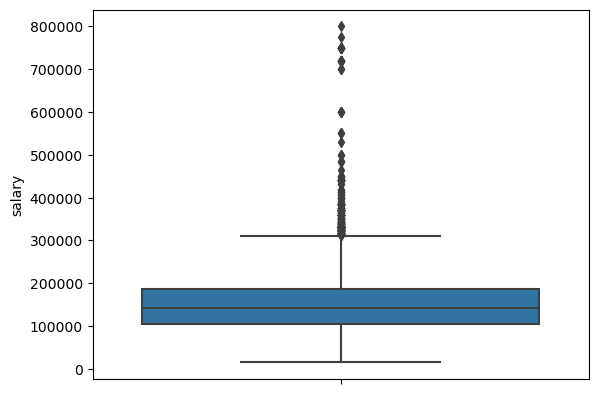

In [10]:
sns.boxplot(y='salary', data=df)

In [11]:
# Top salaries seems to be from specialized jobs such as AI, ML or research.
# Independent analysis for top and normal salaries is the suggestion.
# The outliers start from 300,000

high_salaries = df[df['salary'] >= 300000]
normal_salaries = df[df['salary'] <= 300000]

high_salaries.to_csv('high_salaries.csv')
normal_salaries.to_csv('normal_salaries.csv')